In [195]:
import numpy as np
import matplotlib.pyplot as plt

In [196]:
%matplotlib inline

# Problem Set 7

### PHYS 441

***

Adam A Miller  
20 November 2023  
version 0.2

Problem sets for Phys 441 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work**. Submissions that only include answers will have points deducted.

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i\$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## New note

**If you submit a jupyter notebook as a pdf MAKE SURE the pdf shows all the text/code within the cells. Lines of code that are very long do not automatically "wrap" when exporting to pdf**

In [197]:
import scipy 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [198]:
%matplotlib inline

## Problem 1) 36 points

In class we built a function to run the Metropolis Hastings algorithm in order to perform MCMC integration. We will expand on that example here. 

**Problem 1a**

Write a function `lnlikelihood` to calculate the log likelihood for observations $y = mx + b$, with uncertainties on the $y_i$. The inputs to this function should be the model parameters `theta`, as well as the observational data `y`, `y_unc`, and `x`.

Write a function `lnprior` to calculate the log of the prior, for a **Gaussian** prior on $m$ and $b$. Use $P(m) = \mathcal{N}(2,1^2)$ and $P(b) = \mathcal{N}(10,5^2)$.

Write a function `lnposterior` that calculates the log of the unnormalized posterior (i.e., you can ignore the evidence $P(D)$).

*Hint* – these functions will be very similar to those from class.

In [199]:
def lnlikelihood(theta, y, x, y_unc):
    m, b = theta # unpack model parameters from theta 
    model_preds = m*x + b # compute model predictions for each x value  
    lnl = -1 * np.sum( (y - model_preds)**2/(2*y_unc**2) ) # compute the log likelihood  

    return lnl 

def lnprior(theta): 
    m, b = theta # unpack model parameters from theta  
    lnp_m = scipy.stats.norm.logpdf(m, 2, 1) # compute the log prior for m 
    lnp_b = scipy.stats.norm.logpdf(b, 10, 5) # compute the log prior for b

    return lnp_m + lnp_b 

def lnposterior(theta, y, x, y_unc): 
    lnl = lnlikelihood(theta, y, x, y_unc) # the log likelihood function 
    lnp = lnprior(theta) # compute the log prior 
    return lnl + lnp # return the log posterior 


**Problem 1b**

Make a scatter plot of the following observations and show the uncertainties on y. 

y = [ 18.29736291, 34.27306694, 36.28221691, -12.50674116, 28.51698955,  6.76299299, 21.95796824,  5.10013127, 22.34652411, 26.24095257, -7.65134878,  6.85798303, 30.84023215, 26.86927236, 13.02012232, 36.19040675, 47.51320751, 27.11466315, 43.12450007, 31.19767253,  5.02105035, 14.74843143, 12.44910031, 14.46034553, 21.54930757]  
y_unc = [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]  
x = [18.46178619, 13.42550614, 19.38315408, 0.51402241, 20.13427388, 3.56157375, 8.44116633, 4.32288449, 10.59034577, 21.54963424, 0.09954113, 2.41771422, 11.84335386, 16.39501881, 13.68538744, 15.49224754, 17.42669444, 10.10883627, 15.5082423, 12.97417389, 10.29889807, 8.56701695, 13.70297965, 6.53515459, 15.36354875]

*Hint* – you can execute the cell below to load the data.

In [200]:
y = np.array([ 18.29736291, 34.27306694, 36.28221691, -12.50674116, 28.51698955,  6.76299299, 21.95796824,  5.10013127, 22.34652411, 26.24095257, -7.65134878,  6.85798303, 30.84023215, 26.86927236, 13.02012232, 36.19040675, 47.51320751, 27.11466315, 43.12450007, 31.19767253,  5.02105035, 14.74843143, 12.44910031, 14.46034553, 21.54930757])
y_unc = np.array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])
x = np.array([18.46178619, 13.42550614, 19.38315408, 0.51402241, 20.13427388, 3.56157375, 8.44116633, 4.32288449, 10.59034577, 21.54963424, 0.09954113, 2.41771422, 11.84335386, 16.39501881, 13.68538744, 15.49224754, 17.42669444, 10.10883627, 15.5082423, 12.97417389, 10.29889807, 8.56701695, 13.70297965, 6.53515459, 15.36354875])

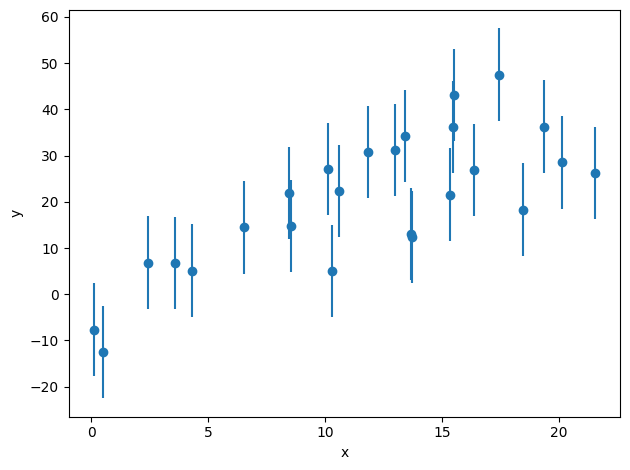

In [201]:
fig, ax = plt.subplots()

ax.errorbar(x, y, y_unc, fmt='o') # complete
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()

**Problem 1c**

Write a function to run the MH algorithm and return the MCMC chain, the log of the posterior at every value within the chain, and the acceptance ratio for each step in the chain.

In [202]:
def hastings_ratio(theta_1, theta_0, y, x, y_unc):
    lnpost1 = lnposterior(theta_1, y, x, y_unc) # complete
    lnpost0 = lnposterior(theta_0, y, x, y_unc) # complete
    
    h_ratio = np.exp(lnpost1)/np.exp(lnpost0) # complete
    
    return h_ratio

def propose_jump(theta, cov):
    if np.shape(theta) == np.shape(cov):
        cov = np.diag(np.array(cov)**2)
    
    proposed_position = np.random.multivariate_normal(theta, cov) # complete
    
    return proposed_position

def mh_mcmc(theta_0, cov, nsteps, y_obs, x, y_unc):
    positions = np.zeros((nsteps+1, len(theta_0)))
    lnpost_at_pos = -np.inf*np.ones(nsteps+1)
    acceptance_ratio = np.zeros_like(lnpost_at_pos)
    accepted = 0

    positions[0] = theta_0
    lnpost_at_pos[0] = lnposterior(theta_0, y_obs, x, y_unc)

    for step_num in range(1,nsteps+1):
        new_pos = propose_jump(positions[step_num-1], cov)
        H = hastings_ratio(new_pos, positions[step_num-1], y_obs, x, y_unc)
        if H >= 1:
            positions[step_num] = new_pos
            lnpost_at_pos[step_num] = lnposterior(new_pos, y_obs, x, y_unc)
            accepted += 1
            acceptance_ratio[step_num] = accepted/step_num
        else:
            r = np.random.rand()
            if r <= H: 
                positions[step_num] = new_pos
                lnpost_at_pos[step_num] = lnposterior(new_pos, y_obs, x, y_unc)
                accepted += 1
                acceptance_ratio[step_num] = accepted/step_num
            else:
                positions[step_num] = positions[step_num-1]
                lnpost_at_pos[step_num] = lnpost_at_pos[step_num-1]
                acceptance_ratio[step_num] = accepted/step_num
    
    return (positions, lnpost_at_pos, acceptance_ratio)

def plot_mh_summary(theta_0, cov, nsteps, y_obs, x, y_unc):
    pos, lnpost, acc = mh_mcmc(theta_0, cov, nsteps, y_obs, x, y_unc)
    print(pos[-1])

    fig = plt.figure(figsize=(7.5,6))
    ax1 = plt.subplot2grid((4,5), (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((4,5), (2, 0), colspan=2, rowspan=2)
    ax3 = plt.subplot2grid((4,5), (0, 2), colspan=3)
    ax4 = plt.subplot2grid((4,5), (1, 2), colspan=3, sharex=ax3)
    ax5 = plt.subplot2grid((4,5), (2, 2), colspan=3, sharex=ax3)
    ax6 = plt.subplot2grid((4,5), (3, 2), colspan=3, sharex=ax3)

    # posterior
    ax1.hexbin(pos[:,0], pos[:,1], gridsize=50, mincnt=1, bins='log')
    # ax1.plot(2.3, 15, '*', ms=30, mfc='Crimson', mec='0.8', mew=2, alpha=0.7)
    ylims = ax1.get_ylim()
    xlims = ax1.get_xlim()
    ax1.plot([pos[-1][0], pos[-1][0]], ylims, 'Crimson', alpha=0.3)
    ax1.plot(xlims, [pos[-1][1], pos[-1][1]], 'Crimson', alpha=0.3)
    ax1.set_ylim(ylims)
    ax1.set_xlim(xlims)
    ax1.set_xlabel('m')
    ax1.set_ylabel('b')
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ax1.tick_params(top=True, bottom=False)
    
    ax2.errorbar(x, y_obs, y_unc, fmt='o')
    for draw in np.random.choice(len(pos), 10, replace=False):
        ax2.plot([0,max(x)], pos[draw,1] + pos[draw,0]*np.array([0, max(x)]),
                 'DarkOrange', alpha=0.4)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    ax3.plot(pos[:,0])
    ax3.set_ylabel('m')
    
    ax4.plot(pos[:,1])
    ax4.set_ylabel('b')

    ax5.plot(lnpost)
    ax5.set_ylabel('$\ln \; \pi$')

    ax6.plot(acc)
    ax6.set_ylabel('acceptance')
    ax6.set_xlabel('step number')
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.93, left=0.09, right=0.99, hspace=0.07, wspace=0.75)

**Problem 1d**

Using the above function, calculate an MCMC chain for 2000 steps. Use a covariance for the multivariate jump proposal `cov = [0.1, 2]`. 

[1.34673151 4.80107435]


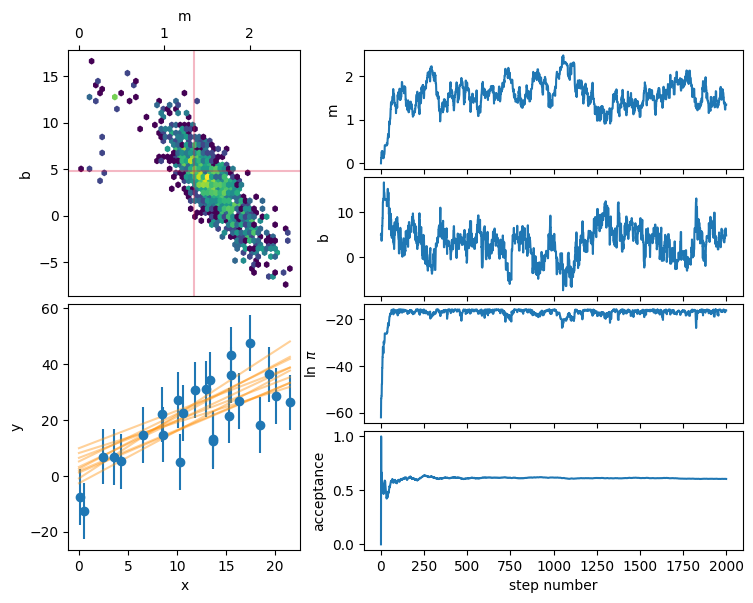

In [203]:
starting_m_b = (0, 5) 
cov = (0.1, 2)

pos, lnpost, acc = mh_mcmc(starting_m_b, cov, 2000, y, x, y_unc)
plot_mh_summary(starting_m_b, cov, 2000, y, x, y_unc)


**Problem 1e**

Plot the marginal distribution for the slope of the line $m$. Overplot the prior, as a solid line, on the same figure. 

What is the 68% credible region for $m$?

*Hint* – the marginal distribution can be shown as a histogram.

*Second hint* – did you account for burn-in?

The 68% credible region is: [1.33252074 1.87958124]


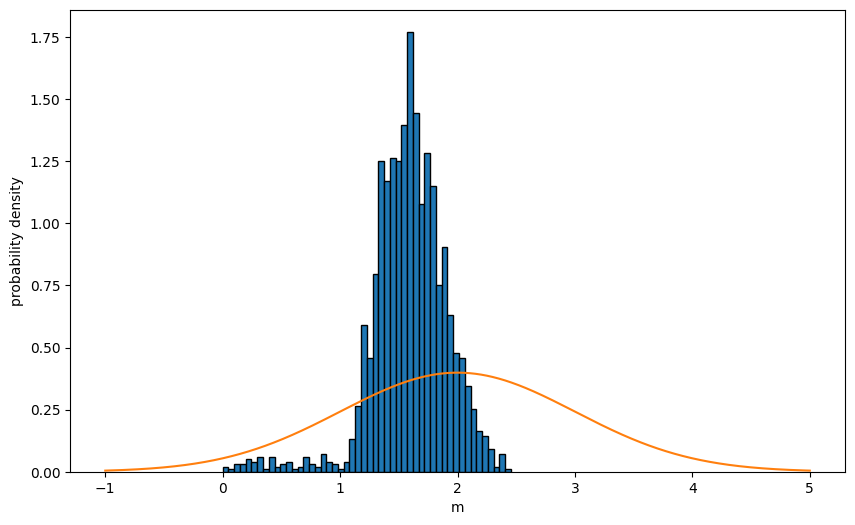

In [204]:
fig, ax = plt.subplots(figsize=(10, 6)) 
marginalized_m = pos[:,0] # complete 

ax.hist(marginalized_m, bins=50, edgecolor='black', density=True, label='marginalized posterior') 
# prior = N(2, 1^2)
mu, std = 2, 1 
x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
y_axis = scipy.stats.norm.pdf(x_axis, mu, std) 
ax.plot(x_axis, y_axis, label='prior') 
ax.set_xlabel('m') 
ax.set_ylabel('probability density') 

cred_interval = np.percentile(marginalized_m, [16, 84])

print(f'The 68% credible region is: {cred_interval}') # complete

**Problem 1f**

How does the maximum-likelihood estimate for $m$ compare?

*Hint* – you can use any of the many different methods we have discussed to determine the MLE slope. 

In [205]:
# Using scipy optimize 
from scipy.optimize import minimize

def nll(theta, y_obs, y_obs_unc, x_obs):
    m, b = theta 
    return 0.5 * np.sum((y_obs-(m*x_obs+b))**2 / y_obs_unc**2) 

initial_guess = (32, 4)

result = minimize(nll, 
                  initial_guess, 
                  args=(y, y_unc, x)
                  )
m, b = result.x
print(f'Using scipy.optimize, m = {m}, b = {b}')

# Using matrix 
ones = np.array([1 for _ in range(len(x))]) 
A = np.vstack((ones, x)).T
Y = np.atleast_2d(y).T
V = np.diag(y_unc**2)

FIRST = A.T @ np.linalg.inv(V) @ A 
SECOND = A.T @ np.linalg.inv(V) @ Y 
RESULT = np.linalg.inv(FIRST) @ SECOND 
[[b], [m]] = RESULT 
print(f'Using matrix inversion, m = {m}, b = {b}') 
print('The MLE for m seems to be a bit larger than the baysian approach, exceeding the 68% credible region of 1.79.') 

Using scipy.optimize, m = 1.8559380245280883, b = -1.165448595936097
Using matrix inversion, m = 1.8559381658905223, b = -1.1654505547402159
The MLE for m seems to be a bit larger than the baysian approach, exceeding the 68% credible region of 1.79.


**Problem 1g**

Modify your M-H algorithm to use a different prior, specifically $P(m) = \mathcal{N}(2.5,0.1^2)$ and $P(b) = \mathcal{N}(0,3^2)$.

*Hint* – you only need to update `lnprior` everything else sould work just fine.

In [206]:
def lnlikelihood(theta, y, x, y_unc):
    m, b = theta # unpack model parameters from theta 
    model_preds = m*x + b # compute model predictions for each x value  
    lnl = -1 * np.sum( (y - model_preds)**2/(2*y_unc**2) ) # compute the log likelihood  

    return lnl 

def lnprior(theta): 
    m, b = theta # unpack model parameters from theta  
    lnp_m = scipy.stats.norm.logpdf(m, 2.5, 0.1) # compute the log prior for m 
    lnp_b = scipy.stats.norm.logpdf(b, 0, 3) # compute the log prior for b

    return lnp_m + lnp_b 

def lnposterior(theta, y, x, y_unc): 
    lnl = lnlikelihood(theta, y, x, y_unc) # the log likelihood function 
    lnp = lnprior(theta) # compute the log prior 
    return lnl + lnp # return the log posterior 

def hastings_ratio(theta_1, theta_0, y, x, y_unc):
    lnpost1 = lnposterior(theta_1, y, x, y_unc) # complete
    lnpost0 = lnposterior(theta_0, y, x, y_unc) # complete
    
    h_ratio = np.exp(lnpost1)/np.exp(lnpost0) # complete
    
    return h_ratio

def propose_jump(theta, cov):
    if np.shape(theta) == np.shape(cov):
        cov = np.diag(np.array(cov)**2)
    
    proposed_position = np.random.multivariate_normal(theta, cov) # complete
    
    return proposed_position

def mh_mcmc(theta_0, cov, nsteps, y_obs, x, y_unc):
    positions = np.zeros((nsteps+1, len(theta_0)))
    lnpost_at_pos = -np.inf*np.ones(nsteps+1)
    acceptance_ratio = np.zeros_like(lnpost_at_pos)
    accepted = 0

    positions[0] = theta_0
    lnpost_at_pos[0] = lnposterior(theta_0, y_obs, x, y_unc)

    for step_num in range(1,nsteps+1):
        new_pos = propose_jump(positions[step_num-1], cov)
        H = hastings_ratio(new_pos, positions[step_num-1], y_obs, x, y_unc)
        if H >= 1:
            positions[step_num] = new_pos
            lnpost_at_pos[step_num] = lnposterior(new_pos, y_obs, x, y_unc)
            accepted += 1
            acceptance_ratio[step_num] = accepted/step_num
        else:
            r = np.random.rand()
            if r <= H: 
                positions[step_num] = new_pos
                lnpost_at_pos[step_num] = lnposterior(new_pos, y_obs, x, y_unc)
                accepted += 1
                acceptance_ratio[step_num] = accepted/step_num
            else:
                positions[step_num] = positions[step_num-1]
                lnpost_at_pos[step_num] = lnpost_at_pos[step_num-1]
                acceptance_ratio[step_num] = accepted/step_num
    
    return (positions, lnpost_at_pos, acceptance_ratio)
    
def plot_mh_summary(theta_0, cov, nsteps, y_obs, x, y_unc):
    pos, lnpost, acc = mh_mcmc(theta_0, cov, nsteps, y_obs, x, y_unc)
    print(pos[-1])

    fig = plt.figure(figsize=(7.5,6))
    ax1 = plt.subplot2grid((4,5), (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((4,5), (2, 0), colspan=2, rowspan=2)
    ax3 = plt.subplot2grid((4,5), (0, 2), colspan=3)
    ax4 = plt.subplot2grid((4,5), (1, 2), colspan=3, sharex=ax3)
    ax5 = plt.subplot2grid((4,5), (2, 2), colspan=3, sharex=ax3)
    ax6 = plt.subplot2grid((4,5), (3, 2), colspan=3, sharex=ax3)

    # posterior
    ax1.hexbin(pos[:,0], pos[:,1], gridsize=50, mincnt=1, bins='log')
    # ax1.plot(2.3, 15, '*', ms=30, mfc='Crimson', mec='0.8', mew=2, alpha=0.7)
    ylims = ax1.get_ylim()
    xlims = ax1.get_xlim()
    ax1.plot([pos[-1][0], pos[-1][0]], ylims, 'Crimson', alpha=0.3)
    ax1.plot(xlims, [pos[-1][1], pos[-1][1]], 'Crimson', alpha=0.3)
    ax1.set_ylim(ylims)
    ax1.set_xlim(xlims)
    ax1.set_xlabel('m')
    ax1.set_ylabel('b')
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ax1.tick_params(top=True, bottom=False)
    
    ax2.errorbar(x, y_obs, y_unc, fmt='o')
    for draw in np.random.choice(len(pos), 10, replace=False):
        ax2.plot([0,max(x)], pos[draw,1] + pos[draw,0]*np.array([0, max(x)]),
                 'DarkOrange', alpha=0.4)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    ax3.plot(pos[:,0])
    ax3.set_ylabel('m')
    
    ax4.plot(pos[:,1])
    ax4.set_ylabel('b')

    ax5.plot(lnpost)
    ax5.set_ylabel('$\ln \; \pi$')

    ax6.plot(acc)
    ax6.set_ylabel('acceptance')
    ax6.set_xlabel('step number')
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.93, left=0.09, right=0.99, hspace=0.07, wspace=0.75)

    return pos, lnpost, acc 

**Problem 1h**

Using the above function, calculate an MCMC chain for 5000 steps. Use a covariance for the multivariate jump proposal `cov = [0.075, 1.5]`. 

[ 2.33816773 -3.58239541]


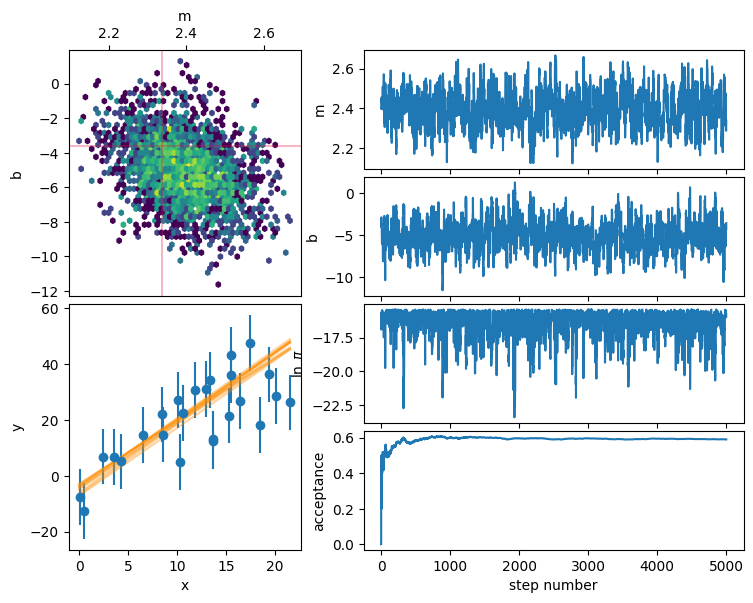

In [207]:
starting_m_b = (2.4, -4) 
cov = (0.075, 1.5)

# mh_mcmc(starting_m_b, cov, 2000, y, x, y_unc)
pos, lnpost, acc = plot_mh_summary(starting_m_b, cov, 5000, y, x, y_unc)

**Problem 1i**

Plot the marginal distribution for the slope of the line $m$. Overplot the prior, as a solid line, on the same figure. 

What is the 68% credible region for $m$?

The 68% credible region is: [2.30387774 2.49416395]


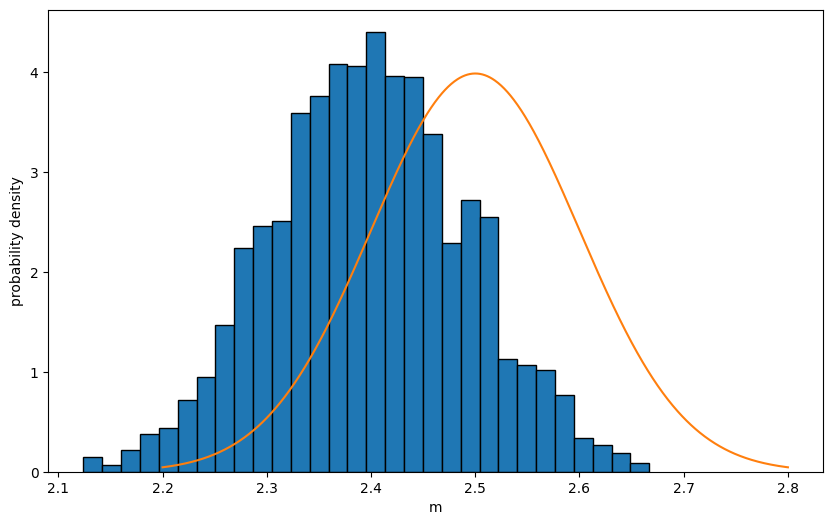

In [208]:
fig, ax = plt.subplots(figsize=(10, 6)) 
marginalized_m = pos[:,0] # complete 

ax.hist(marginalized_m, bins=30, edgecolor='black', density=True, label='marginalized posterior') 
mu, std = 2.5, 0.1 
x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
y_axis = scipy.stats.norm.pdf(x_axis, mu, std) 
ax.plot(x_axis, y_axis, label='prior') 
ax.set_xlabel('m') 
ax.set_ylabel('probability density') 

cred_interval = np.percentile(marginalized_m, [16, 84])

print(f'The 68% credible region is: {cred_interval}') # complete

**Problem 1j**

Select 7 random samples from your chain. Each of these constitutes a posterior predictive sample. Overplot the lines defined by these samples on top of the data. 

What can you say about the prior adopted in **1g**?

The prior in 1g is more restrictive because it has a smaller standard deviation.
Hence in the posterior we see that the credible region is smaller than in 1f.


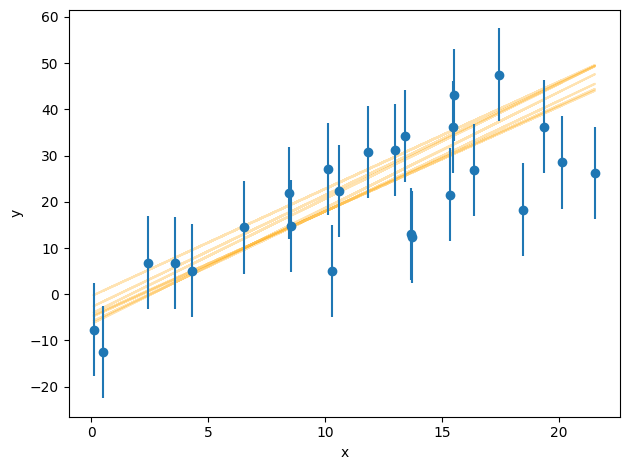

In [209]:
fig, ax = plt.subplots()
# random_lists = my_2d_array[np.random.choice(my_2d_array.shape[0], size=7, replace=False)]
pos_rand = pos[np.random.choice(pos.shape[0], size=7, replace=False)]

for m, b in pos_rand:
    ax.plot(x, m*x + b, color='Orange', alpha=0.3)


ax.errorbar(x, y, y_unc, fmt='o') # complete
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()

print('The prior in 1g is more restrictive because it has a smaller standard deviation.')
print('Hence in the posterior we see that the credible region is smaller than in 1f.') 

*write your answer here*


## Problem 2) 10 points

In this problem we will conduct a simple experiment and use the results to update priors.  

**Problem 2a** 

You are given a bag that has 4 bills of US currency in it. The bills are either $\$1$ or $\$100$, but you have no information about how many are $\$1$ and how many are $\$100$. 

Using the principle of indifference, write down a prior for the number of $\$100$ bills in the bag. Plot the prior.

*Hint* – the prior is discrete, but like all p.d.f.s must sum to 1.

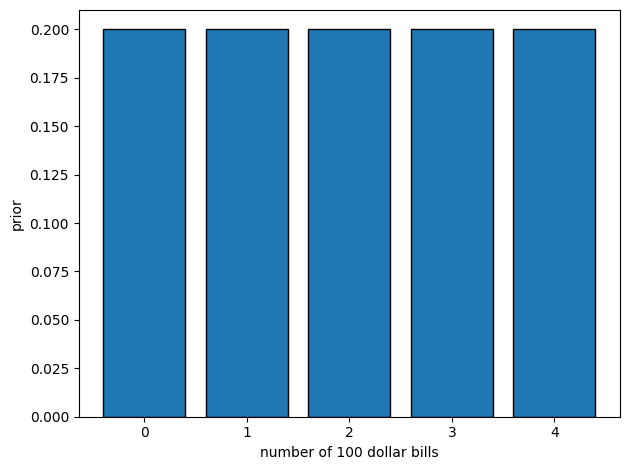

In [210]:
# the number of 100 dollar bills can be 0, 1, 2, 3, 4, 
# each possibility is equally likely with a probability of 1/5 

x_axis = np.arange(0, 5, 1) 
prior = np.array([1/5 for _ in range(len(x_axis))]) 

fig, ax = plt.subplots()     
ax.bar(x_axis, prior, edgecolor='black')   

ax.set_xlabel('number of 100 dollar bills') 
ax.set_ylabel('prior') 

plt.tight_layout() 

**Problem 2b**

You are allowed to select a single bill from the bag, and it is a $\$100$. 

Calculate the likelihood for each possible configuration of bills given "the data" (i.e., that one drawn bill was $\$100$). 

Plot the likelihood $p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100})$.

$p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100}=0) = 0$  

$p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100}=1) = \frac{1}{4}$  

$p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100}=2) = \frac{2}{4} = \frac{1}{2}$  

$p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100}=3) = \frac{3}{4}$  

$p(\textrm{draw a } \$100 \textrm{ bill} | N_{\$100}=4) = 1$  

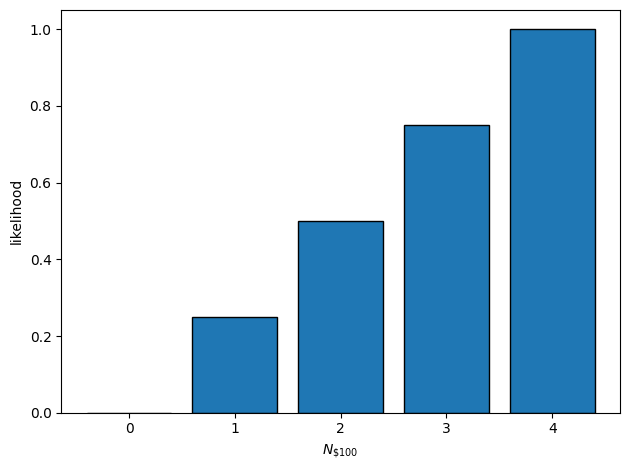

In [211]:
x_axis = np.arange(0, 5, 1) 
likelihood_exp1 = np.array([0, 0.25, 0.5, 0.75, 1]) 

fig, ax = plt.subplots()     
ax.bar(x_axis, likelihood_exp1, edgecolor='black')   

ax.set_xlabel('$N_{\$100}$') 
ax.set_ylabel('likelihood') 

plt.tight_layout() 

**Problem 2c**

Using your likelihood and prior, calculate the posterior for the number of $\$100$ bills in the bag. 

*Hint* – the posterior is a p.d.f.

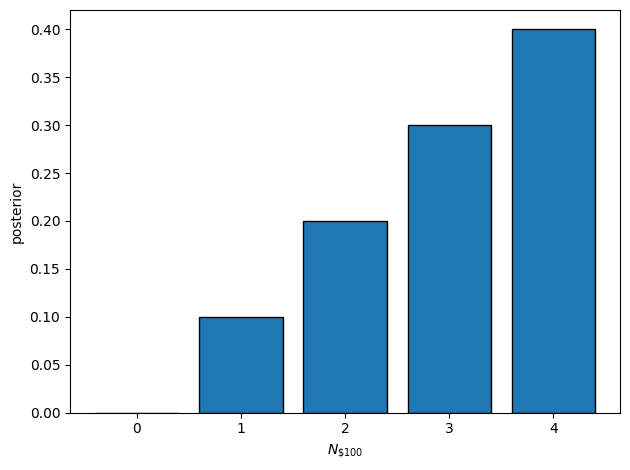

In [212]:
x_axis = np.arange(0, 5, 1) 
posterior_exp1_unnormalized = prior * likelihood_exp1  
posterior_exp1 = posterior_exp1_unnormalized * (1/np.sum(posterior_exp1_unnormalized))# normalize such that the pdf sums to 1 

fig, ax = plt.subplots()     
ax.bar(x_axis, posterior_exp1, edgecolor='black')   

ax.set_xlabel('$N_{\$100}$') 
ax.set_ylabel('posterior') 

plt.tight_layout() 

**Problem 2d**

The $\$100$ bill is placed back in the bag. You select another bill from the bag, it is a $\$1$ bill. 

Plot the likelihood, $p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100})$, for drawing a $\$1$ bill from the bag.

$p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100}=0) = 1$  

$p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100}=1) = \frac{3}{4}$  

$p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100}=2) = \frac{2}{4} = \frac{1}{2}$  

$p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100}=3) = \frac{1}{4}$  

$p(\textrm{draw a } \$1 \textrm{ bill} | N_{\$100}=4) = 0$ 

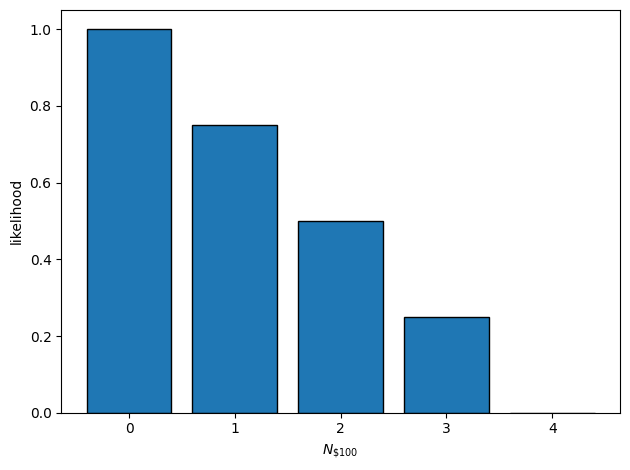

In [213]:
x_axis = np.arange(0, 5, 1) 
likelihood_exp2 = np.array([1, 0.75, 0.5, 0.25, 0]) 

fig, ax = plt.subplots()     
ax.bar(x_axis, likelihood_exp2, edgecolor='black')   

ax.set_xlabel('$N_{\$100}$') 
ax.set_ylabel('likelihood') 

plt.tight_layout() 

**Problem 2e**

Calculate the posterior for the number of $\$100$ bills in the bag. Use the results from the first experiment as your prior for the second experiment.

Do your results make sense?

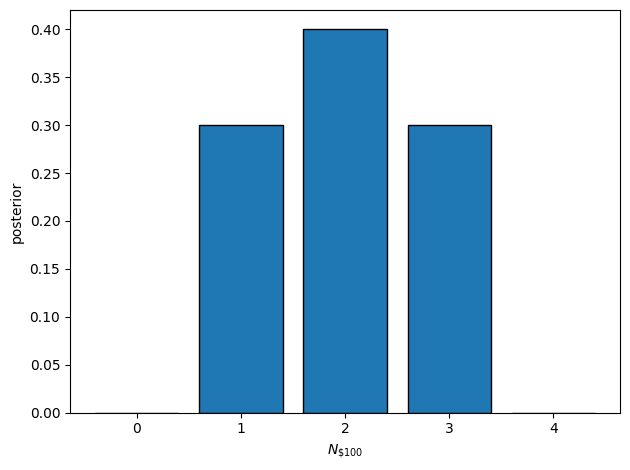

In [214]:
x_axis = np.arange(0, 5, 1) 
posterior_exp2_unnormalized = posterior_exp1 * likelihood_exp2 
posterior_exp2 = posterior_exp2_unnormalized * (1/np.sum(posterior_exp2_unnormalized))# normalize such that the pdf sums to 1 

fig, ax = plt.subplots()     
ax.bar(x_axis, posterior_exp2, edgecolor='black')   

ax.set_xlabel('$N_{\$100}$') 
ax.set_ylabel('posterior') 

plt.tight_layout() 

I think the results make sense. Since we've already observed one 1 dollar bill and one 100 dollar bill, the number of 100 dollar bills cannot be 0 or 4. From the two experiments we get one 1 dollar bill and one 100 dollar bill, so it makes sense to guess the bag has equal numbers of both bills. 

## Problem 3) 24 points

Unreliable experimentalists. 

You (foolishly!) decide to befriend an experimentalist. The experimentalist has collected some observations of a random variable that has a linear relationship to a dependent variable (i.e., $y = mx + b$). 

**Problem 3a**

The experimentalist gives you the observations: 

y = [-323.06784362, 951.5329835, 1624.60411937, 523.71102977, 1686.81461432, 1145.33647822, 407.52259706, 89.49034911, 422.37688187, 1780.61985005, 2202.77330898, 593.47430676, 1207.13832901, 82.44438696, 852.46085987, 1725.32546389, 2118.72500295, 1714.81144005]  
y_unc = [145.04890632, 156.95558291, 101.25609822, 70.28530931, 160.83777037, 121.67910032, 85.69670104, 59.59170488, 97.94085661, 64.82428022, 66.79395355, 83.56478711, 79.71422451, 97.82879082, 67.80030955, 117.7953663, 68.01463333, 97.25222409]
x = [24.99003241, 9.39199623, 61.78810068, 6.12686943, 66.76437623, 76.27093556, 11.197759, 4.34864028, 41.85616486, 99.85155482, 97.88906765, 25.95412469, 56.43497299, 24.4771456, 32.52404943, 90.02733475, 95.55748004, 72.97647065]


Make a scatter plot of the data. What are your first impressions of the observations?

*Hint* – you can execute the cell below to load the data.

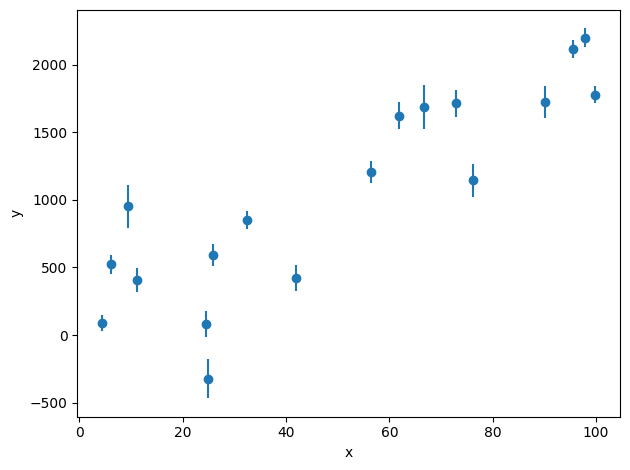

In [215]:
y = np.array([-323.06784362, 951.5329835, 1624.60411937, 523.71102977, 1686.81461432, 1145.33647822, 407.52259706, 89.49034911, 422.37688187, 1780.61985005, 2202.77330898, 593.47430676, 1207.13832901, 82.44438696, 852.46085987, 1725.32546389, 2118.72500295, 1714.81144005])
y_unc = np.array([145.04890632, 156.95558291, 101.25609822, 70.28530931, 160.83777037, 121.67910032, 85.69670104, 59.59170488, 97.94085661, 64.82428022, 66.79395355, 83.56478711, 79.71422451, 97.82879082, 67.80030955, 117.7953663, 68.01463333, 97.25222409])
x = np.array([24.99003241, 9.39199623, 61.78810068, 6.12686943, 66.76437623, 76.27093556, 11.197759, 4.34864028, 41.85616486, 99.85155482, 97.88906765, 25.95412469, 56.43497299, 24.4771456, 32.52404943, 90.02733475, 95.55748004, 72.97647065])

fig, ax = plt.subplots()

ax.errorbar(x, y, y_unc, fmt='o') # complete
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()


**Problem 3b**

Calculate the MLE for the slope and intercept of the line relating $y$ and $x$. 

In [216]:
# Using scipy optimize 
from scipy.optimize import minimize

def nll(theta, y_obs, y_obs_unc, x_obs):
    m, b = theta 
    return 0.5 * np.sum((y_obs-(m*x_obs+b))**2 / y_obs_unc**2) 

initial_guess = (32, 4)

result = minimize(nll, 
                  initial_guess, 
                  args=(y, y_unc, x)
                  )
m, b = result.x
print(f'Using scipy.optimize, m = {m}, b = {b}')

# Using matrix 
ones = np.array([1 for _ in range(len(x))]) 
A = np.vstack((ones, x)).T
Y = np.atleast_2d(y).T
V = np.diag(y_unc**2)

FIRST = A.T @ np.linalg.inv(V) @ A 
SECOND = A.T @ np.linalg.inv(V) @ Y 
RESULT = np.linalg.inv(FIRST) @ SECOND 
[[b], [m]] = RESULT 
print(f'Using matrix inversion, m = {m}, b = {b}') 

Using scipy.optimize, m = 19.405623556461972, b = 100.53652320878702
Using matrix inversion, m = 19.405626512293253, b = 100.53635849829028


**Problem 3c**

You suspect that your experimentalist friend has made a mistake. However, when you ask them if there may be any issues with the data the experimentalist becomes extremely defensive and decides to no longer talk to you. 

You are left to proceed with your analysis with no additional information about the experiment. 

A general way to adjust the model is to "inflate" the uncertainties by a constant scaling factor, $A$. In doing so, the normal Gaussian p.d.f. becomes: 

$$p(\{y_i\}|\{x_i\}, \{\sigma_{y_i}\}, m, b, A) = \frac{1}{\sqrt{2\pi A^2 \sigma_{y_i}^2}} \exp\left(-\frac{(y_i - mx_i - b)^2}{2A^2\sigma_{y_i}^2}\right)$$


Write functions to calculate the likelihood, prior, and posterior for the given observations and model parameters $m, b,$ and $A$. 

*Hint* – think about the appropriate prior for A.

In [217]:
def lnlikelihood(theta, y, x, y_unc):
    m, b, A = theta # unpack model parameters from theta 
    model_preds = m*x + b # compute model predictions for each x value  
    lnl = -1 * np.sum( (y - model_preds)**2/(2*(A**2)*(y_unc**2)) ) # compute the log likelihood  

    return lnl 

def lnprior(theta): 
    m, b, A = theta # unpack model parameters from theta  

    if (0 <= m <= 50) and (-300 <= b <= 300) and (-10 <= A <= 10):
        lnp = np.log(1/50) + np.log(1/600) + np.log(1/20) 
    else:
        lnp = -np.inf # complete
    return lnp 

def lnposterior(theta, y, x, y_unc): 
    lnp = lnprior(theta) # compute the log prior  
    if not np.isfinite(lnp): return -np.inf
    lnl = lnlikelihood(theta, y, x, y_unc) # the log likelihood function 
    
    return lnl + lnp # return the log posterior 

**Problem 3d**

Run a MH MCMC for 25000 steps. Use `cov = [1,10,0.5]` for the sampler.

*Hint* – you may need to refine your initial guess a few times.

[16.17516174 65.09644896  7.08587049]


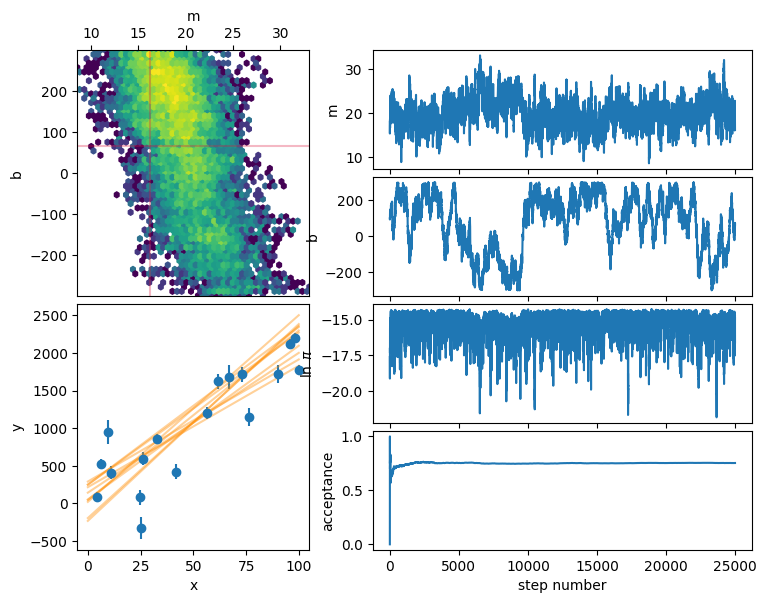

In [218]:
def hastings_ratio(theta_1, theta_0, y, x, y_unc):
    lnpost1 = lnposterior(theta_1, y, x, y_unc) # complete
    lnpost0 = lnposterior(theta_0, y, x, y_unc) # complete
    
    h_ratio = np.exp(lnpost1)/np.exp(lnpost0) # complete
    
    return h_ratio

def propose_jump(theta, cov):
    if np.shape(theta) == np.shape(cov):
        cov = np.diag(np.array(cov)**2)
    
    proposed_position = np.random.multivariate_normal(theta, cov) # complete
    
    return proposed_position

def mh_mcmc(theta_0, cov, nsteps, y_obs, x, y_unc):
    positions = np.zeros((nsteps+1, len(theta_0)))
    lnpost_at_pos = -np.inf*np.ones(nsteps+1)
    acceptance_ratio = np.zeros_like(lnpost_at_pos)
    accepted = 0

    positions[0] = theta_0
    lnpost_at_pos[0] = lnposterior(theta_0, y_obs, x, y_unc)

    for step_num in range(1,nsteps+1):
        new_pos = propose_jump(positions[step_num-1], cov)
        H = hastings_ratio(new_pos, positions[step_num-1], y_obs, x, y_unc)
        if H >= 1:
            positions[step_num] = new_pos
            lnpost_at_pos[step_num] = lnposterior(new_pos, y_obs, x, y_unc)
            accepted += 1
            acceptance_ratio[step_num] = accepted/step_num
        else:
            r = np.random.rand()
            if r <= H: 
                positions[step_num] = new_pos
                lnpost_at_pos[step_num] = lnposterior(new_pos, y_obs, x, y_unc)
                accepted += 1
                acceptance_ratio[step_num] = accepted/step_num
            else:
                positions[step_num] = positions[step_num-1]
                lnpost_at_pos[step_num] = lnpost_at_pos[step_num-1]
                acceptance_ratio[step_num] = accepted/step_num
    
    return (positions, lnpost_at_pos, acceptance_ratio)

def plot_mh_summary(theta_0, cov, nsteps, y_obs, x, y_unc):
    pos, lnpost, acc = mh_mcmc(theta_0, cov, nsteps, y_obs, x, y_unc)
    print(pos[-1])

    fig = plt.figure(figsize=(7.5,6))
    ax1 = plt.subplot2grid((4,5), (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((4,5), (2, 0), colspan=2, rowspan=2)
    ax3 = plt.subplot2grid((4,5), (0, 2), colspan=3)
    ax4 = plt.subplot2grid((4,5), (1, 2), colspan=3, sharex=ax3)
    ax5 = plt.subplot2grid((4,5), (2, 2), colspan=3, sharex=ax3)
    ax6 = plt.subplot2grid((4,5), (3, 2), colspan=3, sharex=ax3)

    # posterior
    ax1.hexbin(pos[:,0], pos[:,1], gridsize=50, mincnt=1, bins='log')
    # ax1.plot(2.3, 15, '*', ms=30, mfc='Crimson', mec='0.8', mew=2, alpha=0.7)
    # ylims = ax1.get_ylim()
    # xlims = ax1.get_xlim()
    all_m, all_b = pos[:,0], pos[:,1]
    ylims = (min(all_b), max(all_b)) 
    xlims = (min(all_m), max(all_m)) 
    ax1.plot([pos[-1][0], pos[-1][0]], ylims, 'Crimson', alpha=0.3)
    ax1.plot(xlims, [pos[-1][1], pos[-1][1]], 'Crimson', alpha=0.3)
    ax1.set_ylim(ylims)
    ax1.set_xlim(xlims)
    ax1.set_xlabel('m')
    ax1.set_ylabel('b')
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ax1.tick_params(top=True, bottom=False)
    
    ax2.errorbar(x, y_obs, y_unc, fmt='o')
    for draw in np.random.choice(len(pos), 10, replace=False):
        ax2.plot([0,max(x)], pos[draw,1] + pos[draw,0]*np.array([0, max(x)]),
                 'DarkOrange', alpha=0.4)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    ax3.plot(pos[:,0])
    ax3.set_ylabel('m')
    
    ax4.plot(pos[:,1])
    ax4.set_ylabel('b')

    ax5.plot(lnpost)
    ax5.set_ylabel('$\ln \; \pi$')

    ax6.plot(acc)
    ax6.set_ylabel('acceptance')
    ax6.set_xlabel('step number')
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.93, left=0.09, right=0.99, hspace=0.07, wspace=0.75)

    return pos, lnpost, acc 

starting_m_b = (18, 100, 5) 
cov = (1, 10, 0.5) 

# pos, lnpost, acc = mh_mcmc(starting_m_b, cov, 2000, y, x, y_unc)
pos, lnpost, acc = plot_mh_summary(starting_m_b, cov, 25000, y, x, y_unc) 

**Problem 3e**

Plot the chains for the slope and the intercept. Do you need to throw away some burn-in samples?

There doesn't seem to be burn ins in the chain because a reasonable starting value is chosen.


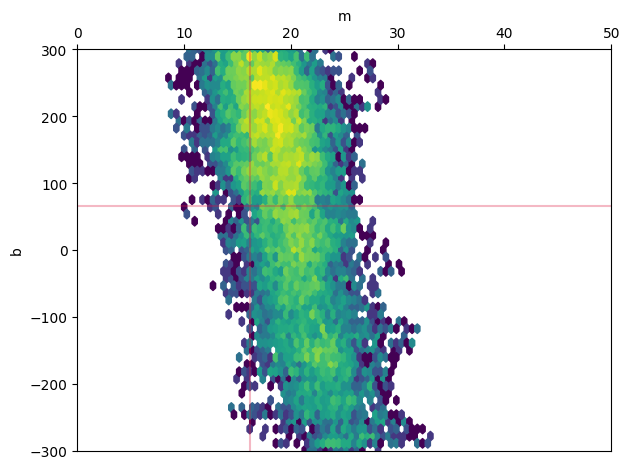

In [219]:
fig, ax = plt.subplots() 

ax.hexbin(pos[:,0], pos[:,1], gridsize=50, mincnt=1, bins='log')
ylims = (-300, 300)
xlims = (0, 50)
ax.plot([pos[-1][0], pos[-1][0]], ylims, 'Crimson', alpha=0.3)
ax.plot(xlims, [pos[-1][1], pos[-1][1]], 'Crimson', alpha=0.3)
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(top=True, bottom=False)

plt.tight_layout() 
print('There doesn\'t seem to be burn ins in the chain because a reasonable starting value is chosen.')  

**Problem 3f**

Plot the marginal distribution for the slope of the line. What is the 68% credible region on the slope?

The 68% credible region is: [16.45977594 23.09126299]


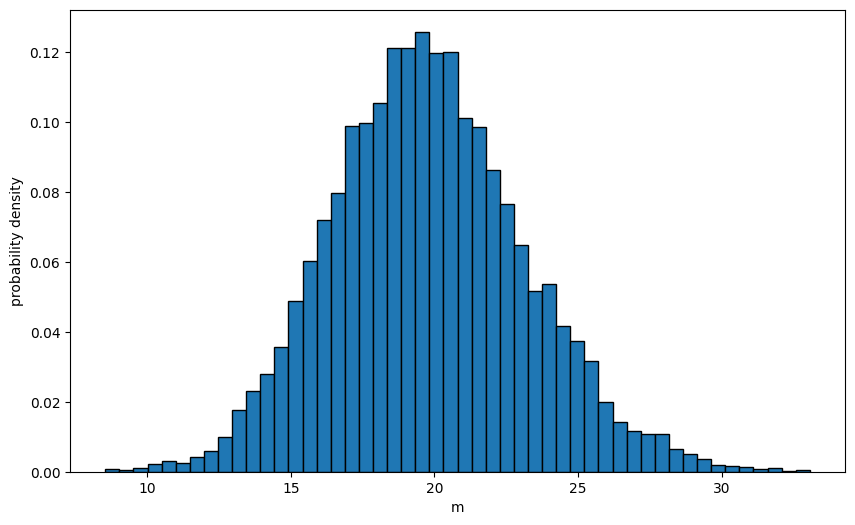

In [220]:
fig, ax = plt.subplots(figsize=(10, 6)) 
marginalized_m = pos[:,0] # complete 

ax.hist(marginalized_m, bins=50, edgecolor='black', density=True, label='marginalized posterior') 
ax.set_xlabel('m') 
ax.set_ylabel('probability density') 

cred_interval = np.percentile(marginalized_m, [16, 84])

print(f'The 68% credible region is: {cred_interval}') # complete


Using `np.polyfit` we can get the MLE confidence intervals on the slope.

In [221]:
p, cov = np.polyfit(x, y, 1, w=1/y_unc, cov=True)

print(f'The MLE slope is {p[0]:.2f} +/- {cov[0][0]**0.5:.2f}')

The MLE slope is 19.41 +/- 1.92


The true answer is that the slope is 23. In that sense we should prefer the Bayes estimate of the slope. 

But that's not the point! 

For real experiments we never know the "true" answer. But we may suspect that the uncertainties are incorrectly estimated. For both the frequentist case and the Bayesian case we can modify the model (and hence likelihood) to inflate the uncertainties by some factor $A$. But if we do this as a frequentist, then we are saying the uncertainties are *definitely* estimated incorrectly and by an amount $\hat{A}$. As a Bayesian, we consider all possible values of $A$, and then integrate our estimate of the posterior over all values of $A$ to arrive at an estimate for $m$ (and it's credible region) *removing any dependence on A for that answer*! 

This is the power of Bayes, and why it is really useful for complex experiments/data systems.